In [116]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

In [117]:
X, y = datasets.make_classification(
    n_samples=50,           # количество образцов
    n_features=2,            # количество признаков (именно 2!)
    n_informative=2,         # информативных признаков (все 2)
    n_redundant=0,           # избыточных признаков (0)
    n_repeated=0,            # повторяющихся признаков (0)
    n_classes=2,             # количество классов
)

X_train, x_test, y_train, y_test = train_test_split(X, y)

In [118]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, x_train, y_train):
        self.x_train, self.y_train = x_train, y_train

    def predict(self, X_test):
        labels = [self.find_labels(x_i) for x_i in X_test]
        return np.array(labels)

    def find_labels(self, x_i):
        distances = [self.metrics(x_i, train_i) for train_i in self.x_train]
        k_nearest = np.argsort(distances)[:self.k]
        y_labels = [self.y_train[i] for i in k_nearest]
        return self.moda(y_labels)
    
    def metrics(self, a, b):
        return np.sqrt(np.sum((a - b)**2))
    
    def moda(self, labels):
        uniq_labels = np.unique(labels)
        most_common = [labels.count(i) for i in uniq_labels]
        return uniq_labels[np.argmax(most_common)]


In [119]:
x = X_train
y = y_train
x_t = x_test
model = KNN()
model.fit(x, y)

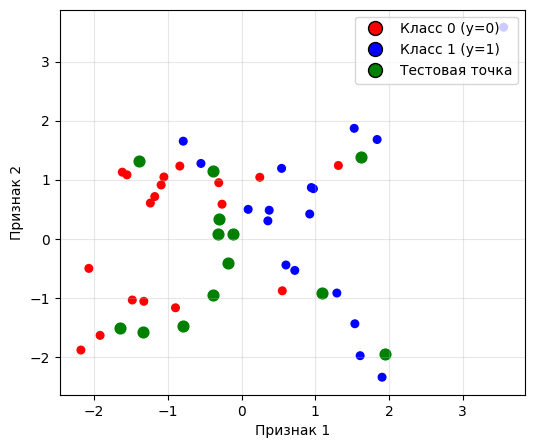

Координаты точки:[-0.79926352 -1.47416516], Класс: 0
Координаты точки:[-0.38722966 -0.95767352], Класс: 0
Координаты точки:[-1.65082792 -1.51747294], Класс: 0
Координаты точки:[-1.39195425  1.31852313], Класс: 0
Координаты точки:[-0.12055872  0.07833632], Класс: 1
Координаты точки:[-1.33675363 -1.57804126], Класс: 0
Координаты точки:[-0.38521657  1.15147472], Класс: 0
Координаты точки:[ 1.94102922 -1.95266646], Класс: 1
Координаты точки:[1.62155733 1.3821164 ], Класс: 1
Координаты точки:[-0.31962858  0.07730311], Класс: 1
Координаты точки:[-0.18901996 -0.41578232], Класс: 1
Координаты точки:[-0.30194098  0.34055434], Класс: 1
Координаты точки:[ 1.09248023 -0.9107564 ], Класс: 1


In [120]:
plt.figure(figsize=(6, 5))


colors = ['red' if value == 0 else 'blue' for value in y_train]

plt.scatter(X_train[:, 0], X_train[:, 1], 
           color=colors, label='Вот так вот', s=30)


plt.scatter(x_t[:, 0], x_t[:, 1], 
           color='green', marker='o', s=60)

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid(True, alpha=0.3)
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Класс 0 (y=0)',
           markerfacecolor='red', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Класс 1 (y=1)',
           markerfacecolor='blue', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Тестовая точка',
           markerfacecolor='green', markersize=10, markeredgecolor='black')
]


plt.legend(handles=legend_elements, loc='upper right')

plt.show()

predict = model.predict(x_t)
for point, c in zip(x_t, predict):
       print(f'Координаты точки:{point}, Класс: {c}')